In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2
from skimage.morphology import skeletonize, binary_closing

In [2]:
def convert_to_binary(image_path):
    # Open the image
    im = Image.open(image_path)

    # Convert the image to grayscale
    im = im.convert("L")

    # Adjust the contrast
    im = im.point(lambda x: 0 if x<128 else 255, "1")

    return im

In [3]:
def main():
    # List of folders
    folders = ["data/{:01d}".format(x) for x in range(32)]

    # Iterate through the folders
    for folder in folders:
        # Get a list of image file paths in the current folder
        image_paths = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".png") or f.endswith(".jpg")]

        # Iterate through the images
        for image_path in image_paths:
            # Convert the image to binary
            binary_image = convert_to_binary(image_path)

            # Save the binary image
            binary_image.save(image_path.replace(".png", ".png").replace(".jpg", ".png"))

In [4]:
def check_bianry_img(path):
    # Open the image
    im = Image.open(path)

    # Check the image's color mode
    if im.mode == "1":
        return "Image is binary"
    else:
        return "Image is not binary"

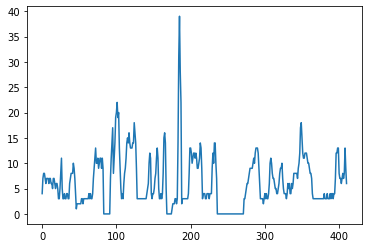

In [5]:
image = Image.open("data/11/1.png").convert("L")
image_array = np.array(image)
threshold = 128
binary_image_array = np.where(image_array > threshold, 255, 0)
vertical_histogram = np.sum(binary_image_array,axis=0)/255
plt.plot(vertical_histogram)
plt.show()

In [6]:
minima = np.array(np.diff(np.sign(np.diff(vertical_histogram))) > 0).nonzero()[0] + 1
minima

array([  5,   9,  12,  14,  18,  22,  23,  28,  29,  31,  32,  35,  36,
        41,  46,  52,  55,  62,  64,  66,  67,  73,  74,  76,  80,  83,
        91,  96, 102, 107, 109, 116, 119, 121, 123, 128, 140, 148, 150,
       158, 159, 161, 168, 174, 178, 181, 188, 196, 202, 206, 209, 210,
       216, 220, 221, 225, 228, 231, 236, 271, 273, 277, 283, 286, 294,
       298, 301, 303, 304, 311, 314, 316, 317, 322, 326, 329, 332, 334,
       335, 337, 344, 352, 353, 358, 361, 365, 379, 381, 383, 385, 387,
       389, 392, 394, 397, 401, 403, 406], dtype=int64)

In [7]:
words = [binary_image_array[:, minima[i]:minima[i+1]] for i in range(len(minima)-1)]

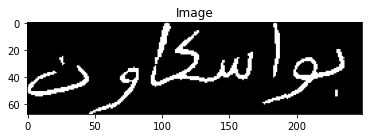

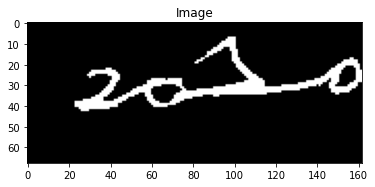

In [8]:
def split_words(image):
    # Preprocessing: Convert to grayscale and apply image binarization
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    
    # Calculate the vertical histogram
    hist = cv2.reduce(image, 0, cv2.REDUCE_AVG).reshape(-1)

    # Identify the break between the two words
    break_index = np.argmin(hist)

    # Extract the first word
    word1 = image[:, :break_index]

    # Extract the second word
    word2 = image[:, break_index:]

    return word1, word2

# Load the image
image = cv2.imread("data/11/1.png")

# Split the image into two words
word1, word2 = split_words(image)

# Display the words
plt.imshow(word1)
plt.title('Image')
plt.show()
plt.imshow(word2)
plt.title('Image')
plt.show()
#cv2.imshow("Word 1", word1)
#cv2.imshow("Word 2", word2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


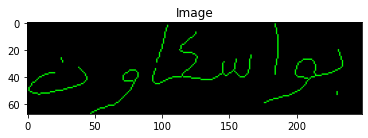

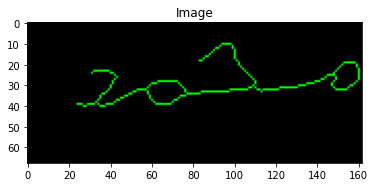

In [9]:
# Load the image
image = cv2.imread("data/11/1.png")

word1, word2 = split_words(image)

# perform skeletonization
word1 = skeletonize(word1)
# perform skeletonization
word2 = skeletonize(word2)

# Display the words
plt.imshow(word1)
plt.title('Image')
plt.show()
plt.imshow(word2)
plt.title('Image')
plt.show()

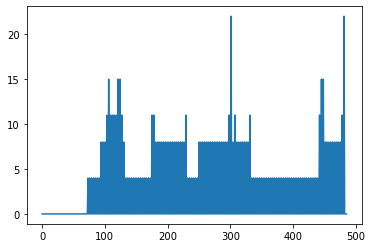

In [10]:
# Calculate the vertical histogram
hist = cv2.reduce(word2, 0, cv2.REDUCE_AVG).reshape(-1)
plt.plot(hist)
plt.show()

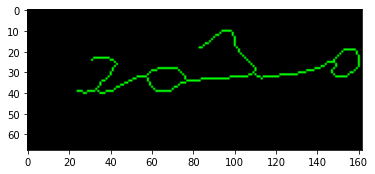

In [26]:
hist[400]
char1 = word2[:,:]
plt.imshow(char1)
plt.show()

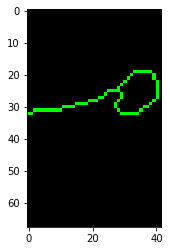

In [27]:
char4 = word2[:,:50]
char3 = word2[:,50:80]
char2 = word2[:,80:120]
char1 = word2[:,120:]
plt.imshow(char1)
plt.show()

In [6]:
check_bianry_img("data/11/1.png")

'Image is binary'

In [9]:
# Load the image
image = cv2.imread('/isolated_alphabets_per_alphabet/ain_begin/user001_ain_begin_031.png')
check_bianry_img('isolated_alphabets_per_alphabet/ain_begin/user001_ain_begin_031.png')

'Image is not binary'